In [1]:
pip install tensorflow matplotlib seaborn scikit-learn


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

In [3]:

# 1. Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:

# 2. Normalize pixel values (0–255 to 0–1)
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# 3. Flatten images (28x28 to 784)
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

# 4. One-hot encode labels
y_train_encoded = to_categorical(y_train, 10)
y_test_encoded = to_categorical(y_test, 10)


In [5]:
# 5. Build MLP model
model = Sequential([
    Dense(256, activation='relu', input_shape=(784,)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')  # 10 output classes
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# 6. Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(),
    metrics=['accuracy']
)

In [7]:

# 7. Train the model
history = model.fit(
    x_train, y_train_encoded,
    epochs=10,
    batch_size=128,
    validation_split=0.2,
    verbose=2
)

Epoch 1/10
375/375 - 5s - 13ms/step - accuracy: 0.9098 - loss: 0.3162 - val_accuracy: 0.9581 - val_loss: 0.1428
Epoch 2/10
375/375 - 4s - 10ms/step - accuracy: 0.9653 - loss: 0.1157 - val_accuracy: 0.9677 - val_loss: 0.1083
Epoch 3/10
375/375 - 4s - 12ms/step - accuracy: 0.9768 - loss: 0.0748 - val_accuracy: 0.9719 - val_loss: 0.0985
Epoch 4/10
375/375 - 3s - 9ms/step - accuracy: 0.9834 - loss: 0.0530 - val_accuracy: 0.9732 - val_loss: 0.0924
Epoch 5/10
375/375 - 6s - 16ms/step - accuracy: 0.9874 - loss: 0.0398 - val_accuracy: 0.9757 - val_loss: 0.0810
Epoch 6/10
375/375 - 4s - 11ms/step - accuracy: 0.9904 - loss: 0.0296 - val_accuracy: 0.9705 - val_loss: 0.1044
Epoch 7/10
375/375 - 3s - 9ms/step - accuracy: 0.9925 - loss: 0.0238 - val_accuracy: 0.9766 - val_loss: 0.0884
Epoch 8/10
375/375 - 3s - 9ms/step - accuracy: 0.9944 - loss: 0.0184 - val_accuracy: 0.9708 - val_loss: 0.1090
Epoch 9/10
375/375 - 4s - 10ms/step - accuracy: 0.9937 - loss: 0.0188 - val_accuracy: 0.9715 - val_loss: 0.

In [8]:
# 8. Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test_encoded, verbose=0)
print(f"\nTest Accuracy: {test_accuracy:.4f}")


Test Accuracy: 0.9752


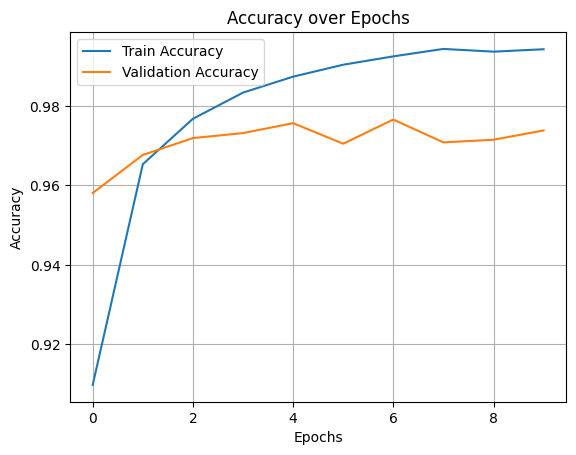

In [9]:
# 9. Plot accuracy vs epochs
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


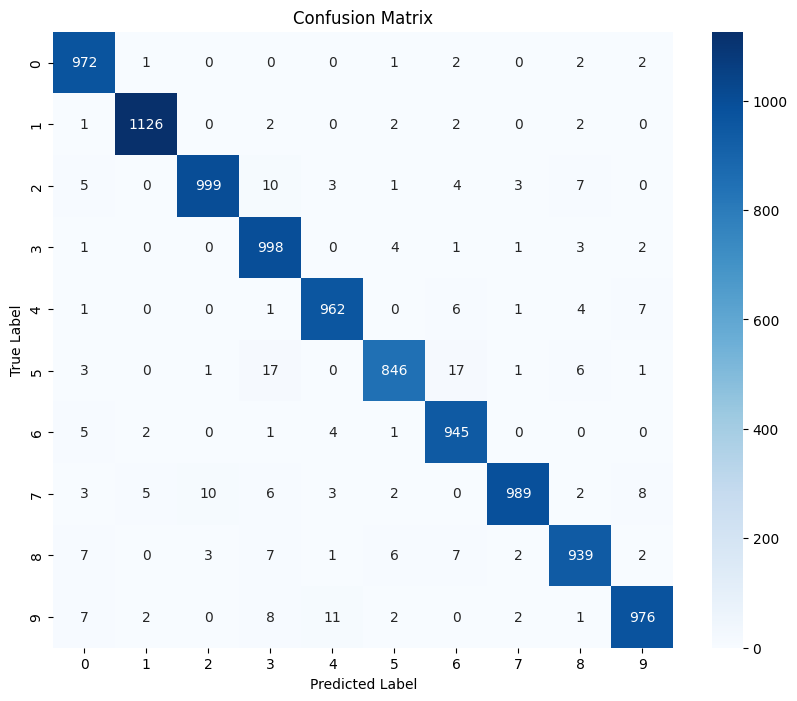


Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.97      0.98      1032
           3       0.95      0.99      0.97      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.95      0.96       892
           6       0.96      0.99      0.97       958
           7       0.99      0.96      0.98      1028
           8       0.97      0.96      0.97       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.97      0.97     10000
weighted avg       0.98      0.98      0.98     10000



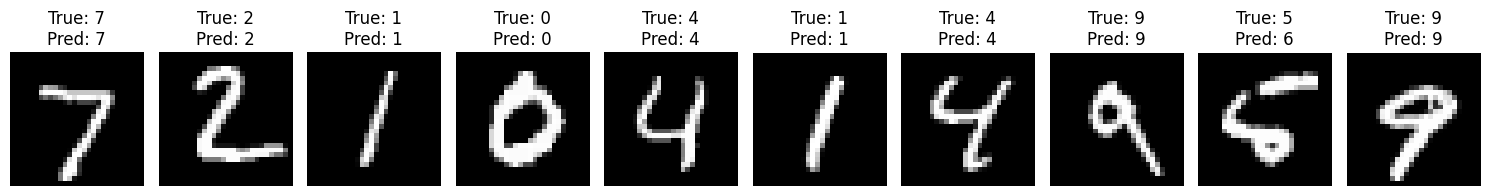

In [10]:

# 10. Confusion Matrix
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

conf_matrix = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# 11. Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_classes))

# 12. Sample Predictions
def plot_sample_predictions(x, y_true, y_pred, num_samples=10):
    plt.figure(figsize=(15, 4))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i+1)
        img = x[i].reshape(28, 28)
        plt.imshow(img, cmap='gray')
        plt.title(f"True: {y_true[i]}\nPred: {y_pred[i]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

plot_sample_predictions(x_test, y_test, y_pred_classes)